In [14]:
#importing job csv file
import pandas as pd
df = pd.read_csv("jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [16]:
df['work_year']= df['work_year'].astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   object
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(2), object(10)
memory usage: 877.2+ KB


In [227]:
df.describe()

,salary,salary_in_usd
count,9355.000000,9355.000000
mean,149927.981293,150299.495564
std,63608.835387,63177.372024
min,14000.000000,15000.000000
25%,105200.000000,105700.000000
50%,143860.000000,143000.000000
75%,187000.000000,186723.000000
max,450000.000000,450000.000000


In [229]:
df.dropna(inplace = True)

In [36]:
new=df.groupby(['work_year','job_category'])['salary_in_usd'].max()
new

work_year  job_category                  
2020       Data Analysis                     135000
           Data Engineering                  188000
           Data Science and Research         450000
           Machine Learning and AI           260000
2021       Data Analysis                     200000
           Data Architecture and Modeling    250000
           Data Engineering                  276000
           Data Management and Strategy      165000
           Data Science and Research         416000
           Leadership and Management         235000
           Machine Learning and AI           423000
2022       BI and Visualization              200000
           Cloud and Database                190000
           Data Analysis                     430967
           Data Architecture and Modeling    345600
           Data Engineering                  324000
           Data Management and Strategy      221300
           Data Quality and Operations       123000
           Data Scienc

In [43]:
new1=pd.DataFrame(new)
new1.reset_index(inplace=True)

In [44]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   work_year      31 non-null     object
 1   job_category   31 non-null     object
 2   salary_in_usd  31 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


In [47]:
twenty_twenty = new1.loc[new1["work_year"] == '2020']
twenty_twenty

,work_year,job_category,salary_in_usd
0,2020,Data Analysis,135000
1,2020,Data Engineering,188000
2,2020,Data Science and Research,450000
3,2020,Machine Learning and AI,260000


In [77]:
data=new1.loc[new1["job_category"] == "Data Analysis"]
data

,work_year,job_category,salary_in_usd
0,2020,Data Analysis,135000
4,2021,Data Analysis,200000
13,2022,Data Analysis,430967
23,2023,Data Analysis,385000


In [110]:
percent=(data["salary_in_usd"].pct_change()*100).round()
data["percentage"]=percent
data["percentage"].fillna(0, inplace=True)
data

#for data analysis

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3149643579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3149643579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
0,2020,Data Analysis,135000,0.0
4,2021,Data Analysis,200000,48.0
13,2022,Data Analysis,430967,115.0
23,2023,Data Analysis,385000,-11.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_year      4 non-null      object 
 1   job_category   4 non-null      object 
 2   salary_in_usd  4 non-null      int64  
 3   percentage     3 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 160.0+ bytes


In [51]:
data_science_research=new1.loc[new1["job_category"] == 'Data Science and Research']
data_science_research

,work_year,job_category,salary_in_usd
2,2020,Data Science and Research,450000
8,2021,Data Science and Research,416000
18,2022,Data Science and Research,380000
28,2023,Data Science and Research,405000


In [111]:
percent=(data_science_research["salary_in_usd"].pct_change()*100).round()

data_science_research["percentage"]=percent
data_science_research["percentage"].fillna(0, inplace=True)
data_science_research
#for data science research

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\110868950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_research["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\110868950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_research["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
2,2020,Data Science and Research,450000,0.0
8,2021,Data Science and Research,416000,-8.0
18,2022,Data Science and Research,380000,-9.0
28,2023,Data Science and Research,405000,7.0


In [52]:
data_eng=new1.loc[new1["job_category"] == 'Data Engineering']
data_eng

,work_year,job_category,salary_in_usd
1,2020,Data Engineering,188000
6,2021,Data Engineering,276000
15,2022,Data Engineering,324000
25,2023,Data Engineering,385000


In [112]:
percent=(data_eng["salary_in_usd"].pct_change()*100).round()

data_eng["percentage"]=percent
data_eng["percentage"].fillna(0, inplace=True)

data_eng

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3382111800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eng["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3382111800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eng["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
1,2020,Data Engineering,188000,0.0
6,2021,Data Engineering,276000,47.0
15,2022,Data Engineering,324000,17.0
25,2023,Data Engineering,385000,19.0


In [54]:
machine=new1.loc[new1["job_category"] == 'Machine Learning and AI']
machine


,work_year,job_category,salary_in_usd
3,2020,Machine Learning and AI,260000
10,2021,Machine Learning and AI,423000
20,2022,Machine Learning and AI,375000
30,2023,Machine Learning and AI,392000


In [113]:
percent=(machine["salary_in_usd"].pct_change()*100).round()

machine["percentage"]=percent
machine["percentage"].fillna(0, inplace=True)

machine

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\1240304859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\1240304859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
3,2020,Machine Learning and AI,260000,0.0
10,2021,Machine Learning and AI,423000,63.0
20,2022,Machine Learning and AI,375000,-11.0
30,2023,Machine Learning and AI,392000,5.0


In [57]:
twenty_one = new1.loc[new1["work_year"] == '2021']
twenty_one

,work_year,job_category,salary_in_usd
4,2021,Data Analysis,200000
5,2021,Data Architecture and Modeling,250000
6,2021,Data Engineering,276000
7,2021,Data Management and Strategy,165000
8,2021,Data Science and Research,416000
9,2021,Leadership and Management,235000
10,2021,Machine Learning and AI,423000


In [58]:
data_archi=new1.loc[new1["job_category"] == 'Data Architecture and Modeling']
data_archi

,work_year,job_category,salary_in_usd
5,2021,Data Architecture and Modeling,250000
14,2022,Data Architecture and Modeling,345600
24,2023,Data Architecture and Modeling,376080


In [114]:
percent=(data_archi["salary_in_usd"].pct_change()*100).round()

data_archi["percentage"]=percent
data_archi["percentage"].fillna(0, inplace=True)
data_archi

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3479913818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_archi["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3479913818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_archi["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
5,2021,Data Architecture and Modeling,250000,0.0
14,2022,Data Architecture and Modeling,345600,38.0
24,2023,Data Architecture and Modeling,376080,9.0


In [60]:
data_mgt=new1.loc[new1["job_category"] == 'Data Management and Strategy']
data_mgt

,work_year,job_category,salary_in_usd
7,2021,Data Management and Strategy,165000
16,2022,Data Management and Strategy,221300
26,2023,Data Management and Strategy,250000


In [115]:
percent=(data_mgt["salary_in_usd"].pct_change()*100).round()

data_mgt["percentage"]=percent
data_mgt["percentage"].fillna(0, inplace=True)
data_mgt

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\548786648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mgt["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\548786648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mgt["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
7,2021,Data Management and Strategy,165000,0.0
16,2022,Data Management and Strategy,221300,34.0
26,2023,Data Management and Strategy,250000,13.0


In [62]:
lead_mgt=new1.loc[new1["job_category"] == 'Leadership and Management']
lead_mgt


,work_year,job_category,salary_in_usd
9,2021,Leadership and Management,235000
19,2022,Leadership and Management,405000
29,2023,Leadership and Management,430640


In [116]:
percent=(lead_mgt["salary_in_usd"].pct_change()*100).round()

lead_mgt["percentage"]=percent
lead_mgt["percentage"].fillna(0, inplace=True)
lead_mgt

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\1093015995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_mgt["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\1093015995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_mgt["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
9,2021,Leadership and Management,235000,0.0
19,2022,Leadership and Management,405000,72.0
29,2023,Leadership and Management,430640,6.0


In [64]:
bi_visual=new1.loc[new1["job_category"] == 'BI and Visualization']
bi_visual

,work_year,job_category,salary_in_usd
11,2022,BI and Visualization,200000
21,2023,BI and Visualization,259900


In [117]:
percent=(bi_visual["salary_in_usd"].pct_change()*100).round()

bi_visual["percentage"]=percent
bi_visual["percentage"].fillna(0, inplace=True)

bi_visual

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3531490330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_visual["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3531490330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_visual["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
11,2022,BI and Visualization,200000,0.0
21,2023,BI and Visualization,259900,30.0


In [66]:
cloud_db=new1.loc[new1["job_category"] == 'Cloud and Database']
cloud_db

,work_year,job_category,salary_in_usd
12,2022,Cloud and Database,190000
22,2023,Cloud and Database,170000


In [118]:
percent=(cloud_db["salary_in_usd"].pct_change()*100).round()

cloud_db["percentage"]=percent
cloud_db["percentage"].fillna(0, inplace=True)

cloud_db

C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\2186438812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_db["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\2186438812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_db["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
12,2022,Cloud and Database,190000,0.0
22,2023,Cloud and Database,170000,-11.0


In [68]:
data_ops=new1.loc[new1["job_category"] == 'Data Quality and Operations']
data_ops

,work_year,job_category,salary_in_usd
17,2022,Data Quality and Operations,123000
27,2023,Data Quality and Operations,289120


In [119]:
percent=(data_ops["salary_in_usd"].pct_change()*100).round()

data_ops["percentage"]=percent
data_ops["percentage"].fillna(0, inplace=True)

data_ops


C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3319062598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ops["percentage"]=percent
C:\Users\PRECIOUS ONYEDEKE\AppData\Local\Temp\ipykernel_6956\3319062598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ops["percentage"].fillna(0, inplace=True)


,work_year,job_category,salary_in_usd,percentage
17,2022,Data Quality and Operations,123000,0.0
27,2023,Data Quality and Operations,289120,135.0


In [70]:
twenty_two = new1.loc[new1["work_year"] == '2022']
twenty_two

,work_year,job_category,salary_in_usd
11,2022,BI and Visualization,200000
12,2022,Cloud and Database,190000
13,2022,Data Analysis,430967
14,2022,Data Architecture and Modeling,345600
15,2022,Data Engineering,324000
16,2022,Data Management and Strategy,221300
17,2022,Data Quality and Operations,123000
18,2022,Data Science and Research,380000
19,2022,Leadership and Management,405000
20,2022,Machine Learning and AI,375000


In [71]:
twenty_three = new1.loc[new1["work_year"] == '2023']
twenty_three

,work_year,job_category,salary_in_usd
21,2023,BI and Visualization,259900
22,2023,Cloud and Database,170000
23,2023,Data Analysis,385000
24,2023,Data Architecture and Modeling,376080
25,2023,Data Engineering,385000
26,2023,Data Management and Strategy,250000
27,2023,Data Quality and Operations,289120
28,2023,Data Science and Research,405000
29,2023,Leadership and Management,430640
30,2023,Machine Learning and AI,392000


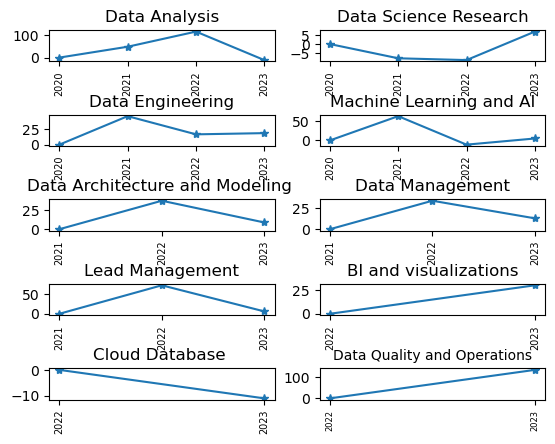

In [129]:
#plot set one

import matplotlib.pyplot as plt
plt.subplot(5,2,1)
plt.plot(data['work_year'],data['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Data Analysis")
#plot set two

plt.subplot(5,2,2)
plt.plot(data_science_research['work_year'],data_science_research['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Data Science Research")

#plot set three

plt.subplot(5,2,3)
plt.plot(data_eng['work_year'],data_eng['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Data Engineering")
#plot set four

plt.subplot(5,2,4)
plt.plot(machine['work_year'],machine['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Machine Learning and AI")
#plot set five

plt.subplot(5,2,5)
plt.plot(data_archi['work_year'],data_archi['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Data Architecture and Modeling ")
#plot set six

plt.subplot(5,2,6)
plt.plot(data_mgt['work_year'],data_mgt['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Data Management")
#plot set seven

plt.subplot(5,2,7)
plt.plot(lead_mgt['work_year'],lead_mgt['percentage'], '*-')
plt.xticks(fontsize=7, rotation='vertical')
plt.title("Lead Management")
#plot set eight

plt.subplot(5,2,8)
plt.plot(bi_visual['work_year'],bi_visual['percentage'], '*-')
plt.xticks(fontsize=6, rotation='vertical')
plt.title("BI and visualizations" size=10 )
#plot set nine

plt.subplot(5,2,9)
plt.plot(cloud_db['work_year'],cloud_db['percentage'], '*-')
plt.xticks(fontsize=6, rotation='vertical')
plt.title("Cloud Database " size=10)
#plot set ten

plt.subplot(5,2,10)
plt.plot(data_ops['work_year'],data_ops['percentage'], '*-')
plt.xticks(fontsize=6, rotation='vertical')
plt.title("Data Quality and Operations", size=10)
plt.subplots_adjust(hspace=1.7)

In [82]:
df['job_title'].nunique()

125

In [80]:
job_cat=df.groupby(['job_category'])['job_title'].nunique()
job_cat

job_category
BI and Visualization              11
Cloud and Database                 1
Data Analysis                     14
Data Architecture and Modeling     7
Data Engineering                  15
Data Management and Strategy       5
Data Quality and Operations        6
Data Science and Research         23
Leadership and Management         14
Machine Learning and AI           29
Name: job_title, dtype: int64

In [4]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.
